In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization
from tensorflow.keras.losses import MeanSquaredError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
data = pd.read_csv("/content/train.csv")

In [3]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [4]:
data.shape

(1000, 12)

In [5]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [6]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.210000e+02 6.332270e+05 8.381440e+05 7.000000e+00 5.578900e+04
  3.000000e+00 7.000000e+00 1.100000e+01 1.620000e+02 8.100000e+01
  1.050000e+02 5.128855e+05]
 [1.640000e+02 5.426130e+05 7.981500e+05 4.000000e+00 8.627200e+04
  3.000000e+00 1.000000e+01 8.000000e+00 1.920000e+02 9.600000e+01
  7.800000e+01 3.751180e+05]
 [8.530000e+02 6.816060e+05 8.747910e+05 4.000000e+00 7.143000e+04
  2.000000e+00 5.000000e+00 1.500000e+01 1.400000e+02 5.200000e+01
  1.060000e+02 4.938065e+05]
 [1.600000e+02 5.582740e+05 7.090740e+05 7.000000e+00 6.023700e+04
  4.000000e+00 3.000000e+00 1.100000e+01 1.850000e+02 7.400000e+01
  1.000000e+02 3.851960e+05]
 [8.110000e+02 6.608420e+05 8.262370e+05 6.000000e+00 1.257350e+05
  2.000000e+00 2.000000e+00 1.000000e+01 1.950000e+02 9.300000e+01
  1.130000e+02 2.369940e+05]], shape=(5, 12), dtype=float32)


In [7]:
 X = tensor_data[:,3:-1]
 print(X[:5])

tf.Tensor(
[[7.00000e+00 5.57890e+04 3.00000e+00 7.00000e+00 1.10000e+01 1.62000e+02
  8.10000e+01 1.05000e+02]
 [4.00000e+00 8.62720e+04 3.00000e+00 1.00000e+01 8.00000e+00 1.92000e+02
  9.60000e+01 7.80000e+01]
 [4.00000e+00 7.14300e+04 2.00000e+00 5.00000e+00 1.50000e+01 1.40000e+02
  5.20000e+01 1.06000e+02]
 [7.00000e+00 6.02370e+04 4.00000e+00 3.00000e+00 1.10000e+01 1.85000e+02
  7.40000e+01 1.00000e+02]
 [6.00000e+00 1.25735e+05 2.00000e+00 2.00000e+00 1.00000e+01 1.95000e+02
  9.30000e+01 1.13000e+02]], shape=(5, 8), dtype=float32)


In [8]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis =-1)
print(y[:5])

tf.Tensor(
[[512885.5]
 [375118. ]
 [493806.5]
 [385196. ]
 [236994. ]], shape=(5, 1), dtype=float32)


In [9]:
normalizer = Normalization(mean =5, variance = 4)
x_normalized= tf.constant([[3,4,5,6,7],
                           [4,5,6,7,8]])

normalizer(x_normalized)

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:GPU:0}} Input to reshape is a tensor with 1 values, but the requested shape has 5 [Op:Reshape]

# Building the model

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.models import Sequential

# Define a Normalization layer
normalizer = Normalization()

# Build the model using Sequential
model = Sequential([
    InputLayer(input_shape =(8,)),
    normalizer,          # Add the normalization layer
    Dense(1)             # Add a Dense layer
])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

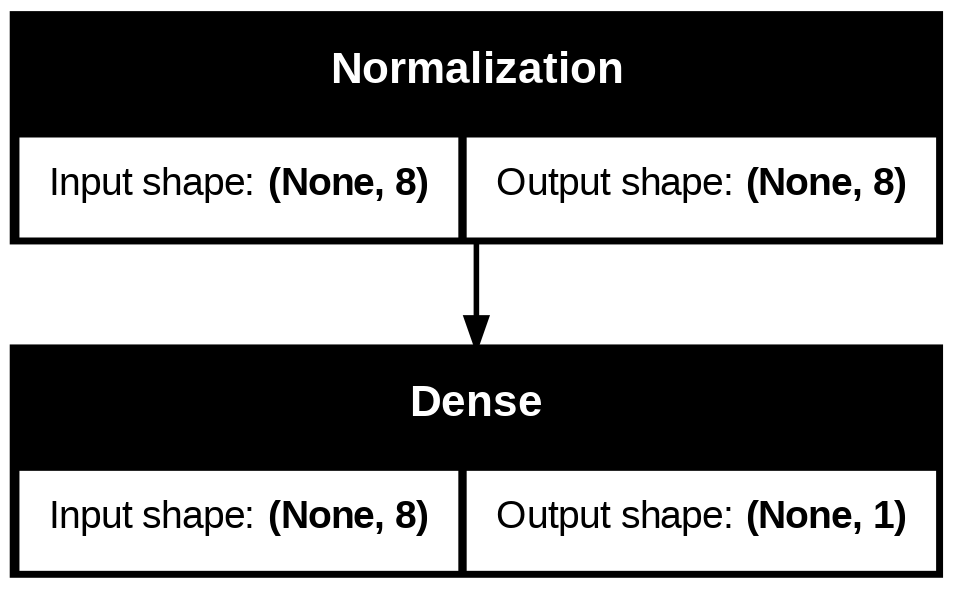

In [11]:
tf.keras.utils.plot_model(
    model,
    to_file = "model.png",
    show_shapes= True
)

In [14]:

import tensorflow as tf
from tensorflow.keras.losses import MeanAbsoluteError
# Compile the model with the correct loss function
model.compile(
    loss=MeanAbsoluteError(),  # Instantiate MeanAbsoluteError
    optimizer='adam',
    metrics=['mean_squared_error']  # Optionally add evaluation metrics
)

In [15]:
history = model.fit(
    X,y, epochs =100, verbose =1
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 249250.7969 - mean_squared_error: 82107613184.0000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244863.5938 - mean_squared_error: 80815243264.0000
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238754.3125 - mean_squared_error: 77186367488.0000
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 237120.6562 - mean_squared_error: 75817222144.0000
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243120.0781 - mean_squared_error: 79283126272.0000
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233993.5156 - mean_squared_error: 76132491264.0000
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 233200.5625 - mean_squared_error: 74176716800.0000
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 230451.0781 - mean_squared_error: 73278676992.0000  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 229734.5625 - mean_squared_error: 73653157888.0000 
Epoch 

In [16]:
history.history

{'loss': [250268.65625,
  247284.546875,
  244321.828125,
  241412.4375,
  238552.359375,
  235800.359375,
  233170.890625,
  230604.375,
  228140.765625,
  225758.5,
  223451.859375,
  221197.40625,
  219033.234375,
  216938.796875,
  214936.21875,
  212977.734375,
  211085.890625,
  209238.625,
  207474.703125,
  205819.359375,
  204236.40625,
  202734.28125,
  201339.21875,
  199976.53125,
  198674.421875,
  197463.75,
  196282.46875,
  195144.09375,
  194062.703125,
  192974.484375,
  191914.734375,
  190927.3125,
  189999.75,
  189098.015625,
  188275.15625,
  187464.6875,
  186680.53125,
  185929.578125,
  185203.875,
  184494.421875,
  183817.9375,
  183187.375,
  182595.328125,
  182053.96875,
  181506.671875,
  180987.78125,
  180486.59375,
  180030.421875,
  179552.578125,
  179120.609375,
  178675.640625,
  178279.859375,
  177890.28125,
  177536.8125,
  177206.875,
  176889.40625,
  176584.984375,
  176292.6875,
  176025.40625,
  175779.53125,
  175534.28125,
  175298.71875

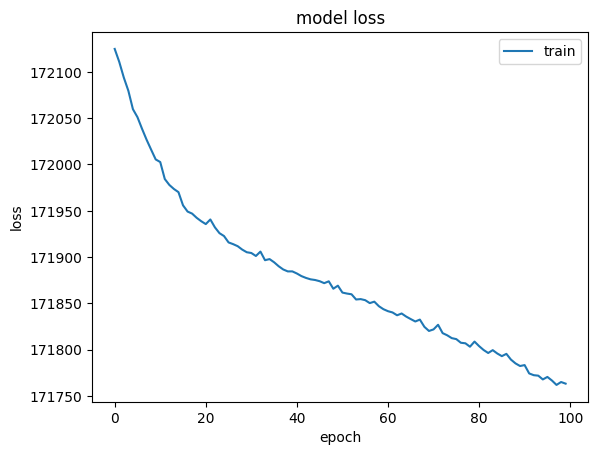

In [33]:
c

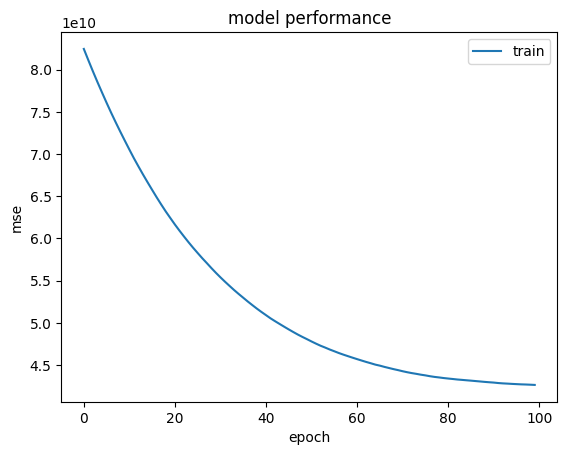

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.title('model performance')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [18]:
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 169929.5312 - mean_squared_error: 42801696768.0000


[172092.5625, 42628804608.0]

In [20]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [27]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194926 , -1.5268263 ,  0.00855871,  0.4987537 , -0.28034025,
        -0.25380328, -0.17291917,  0.07492349],
       [-0.32650068, -0.48059055,  0.00855871,  1.5614392 , -1.6259733 ,
         1.3023156 ,  0.5585499 , -1.2078476 ],
       [-0.32650068, -0.9899968 , -0.7046623 , -0.20970327,  1.5138373 ,
        -1.3949572 , -1.5870926 ,  0.12243354],
       [ 1.4194926 , -1.3741622 ,  0.72177976, -0.91816026, -0.28034025,
         0.9392212 , -0.5142714 , -0.1626267 ],
       [ 0.83749485,  0.8738561 , -0.7046623 , -1.2723887 , -0.72888464,
         1.4579276 ,  0.41225606,  0.4550038 ]], dtype=float32)>

In [28]:
model.compile(
    loss=MeanAbsoluteError(),  # Instantiate MeanAbsoluteError
    optimizer='adam',
    metrics=['mean_squared_error']  # Optionally add evaluation metrics
)

In [35]:
# Assuming DATASET_SIZE, TRAIN_RATIO, and VAL_RATIO are defined
DATASET_SIZE = len(X)  # Total size of the dataset
TRAIN_RATIO = 0.8      # Proportion of data for training
VAL_RATIO = 0.1        # Proportion of data for validation

# Compute slice indices
train_end = int(DATASET_SIZE * TRAIN_RATIO)  # End index for training data
val_end = train_end + int(DATASET_SIZE * VAL_RATIO)  # End index for validation data

# Fixing the slicing logic
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# Print shapes to verify
print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Test data:", X_test.shape, y_test.shape)


Training data: (800, 8) (800, 1)
Validation data: (100, 8) (100, 1)
Test data: (100, 8) (100, 1)


In [36]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 100,
    verbose =1
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 174315.9844 - mean_squared_error: 43552321536.0000 - val_loss: 184216.5000 - val_mean_squared_error: 46568124416.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173787.7656 - mean_squared_error: 43789012992.0000 - val_loss: 184285.1406 - val_mean_squared_error: 46612062208.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172499.5625 - mean_squared_error: 42238877696.0000 - val_loss: 184236.3125 - val_mean_squared_error: 46581190656.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165656.0000 - mean_squared_error: 39933059072.0000 - val_loss: 184274.2031 - val_mean_squared_error: 46605553664.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164278.0000 - mean_squared_error: 39378616320.0000 - val_loss: 184236.7344 - val_mean_squared_error: 46581923840.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173511.6562 - mean_squared_error: 43349110784.0000 - val

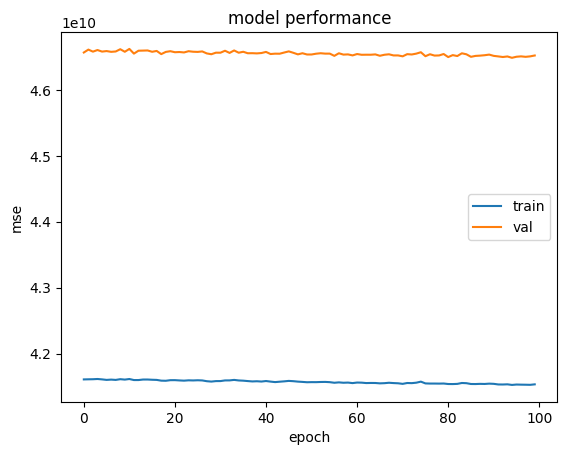

In [40]:
from matplotlib import pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

plt.title('model performance')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

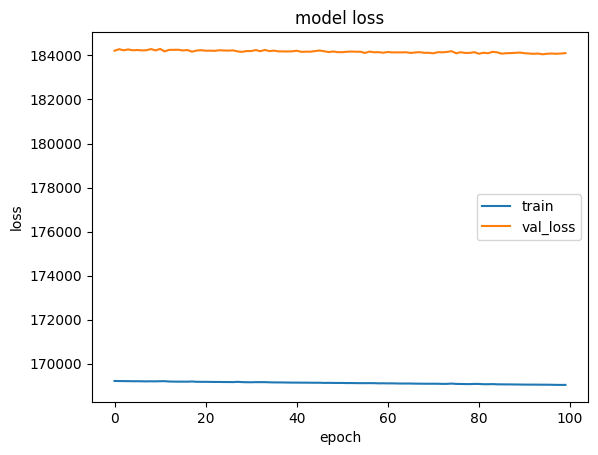

In [39]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

In [41]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 175476.1406 - mean_squared_error: 43024244736.0000 


[180875.0, 45381410816.0]

In [42]:
X_test.shape

TensorShape([100, 8])

In [43]:
model.predict(X_test).shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(100, 1)

In [44]:
X_test[0].shape

TensorShape([8])

In [45]:
model.predict(tf.expand_dims(X_test[0], axis =0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


array([[317372.38]], dtype=float32)

In [47]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([179077.], dtype=float32)>

In [48]:
y_true = list(y_test[:,0].numpy())

In [49]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[317372.38, 269497.7, 295224.97, 142119.92, 167141.38, 124302.67, 161451.66, 320633.56, 133902.11, 125177.055, 136197.89, 263059.53, 178398.6, 309671.53, 204315.67, 198842.16, 317859.03, 298828.25, 195198.62, 214346.62, 303082.7, 256410.33, 325832.38, 295888.53, 120264.72, 199346.8, 310646.06, 293960.34, 308986.78, 290590.44, 262655.53, 257240.77, 219278.47, 253005.95, 140156.28, 145135.69, 199016.11, 138111.02, 170339.52, 237407.19, 323023.56, 254280.47, 231199.56, 305546.97, 294608.12, 172687.56, 195227.77, 166508.33, 165896.62, 139193.62, 275714.12, 170849.8, 117620.664, 189886.69, 261711.39, 284703.25, 211458.73, 223253.25, 200458.1, 153540.89, 171444.84, 215461.19, 188776.25, 217394.03, 259953.25, 136699.62, 131131.55, 224990.81, 311290.06, 148426.97, 311179.03, 306933.66, 214964.66, 323330.72, 271822.25, 125083.14, 214527.77, 208121.92, 317867.34, 148144.56, 319144.6, 296687.94, 122175.234, 202622.3, 328405.34, 237569.75, 187676.84, 182226.88

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


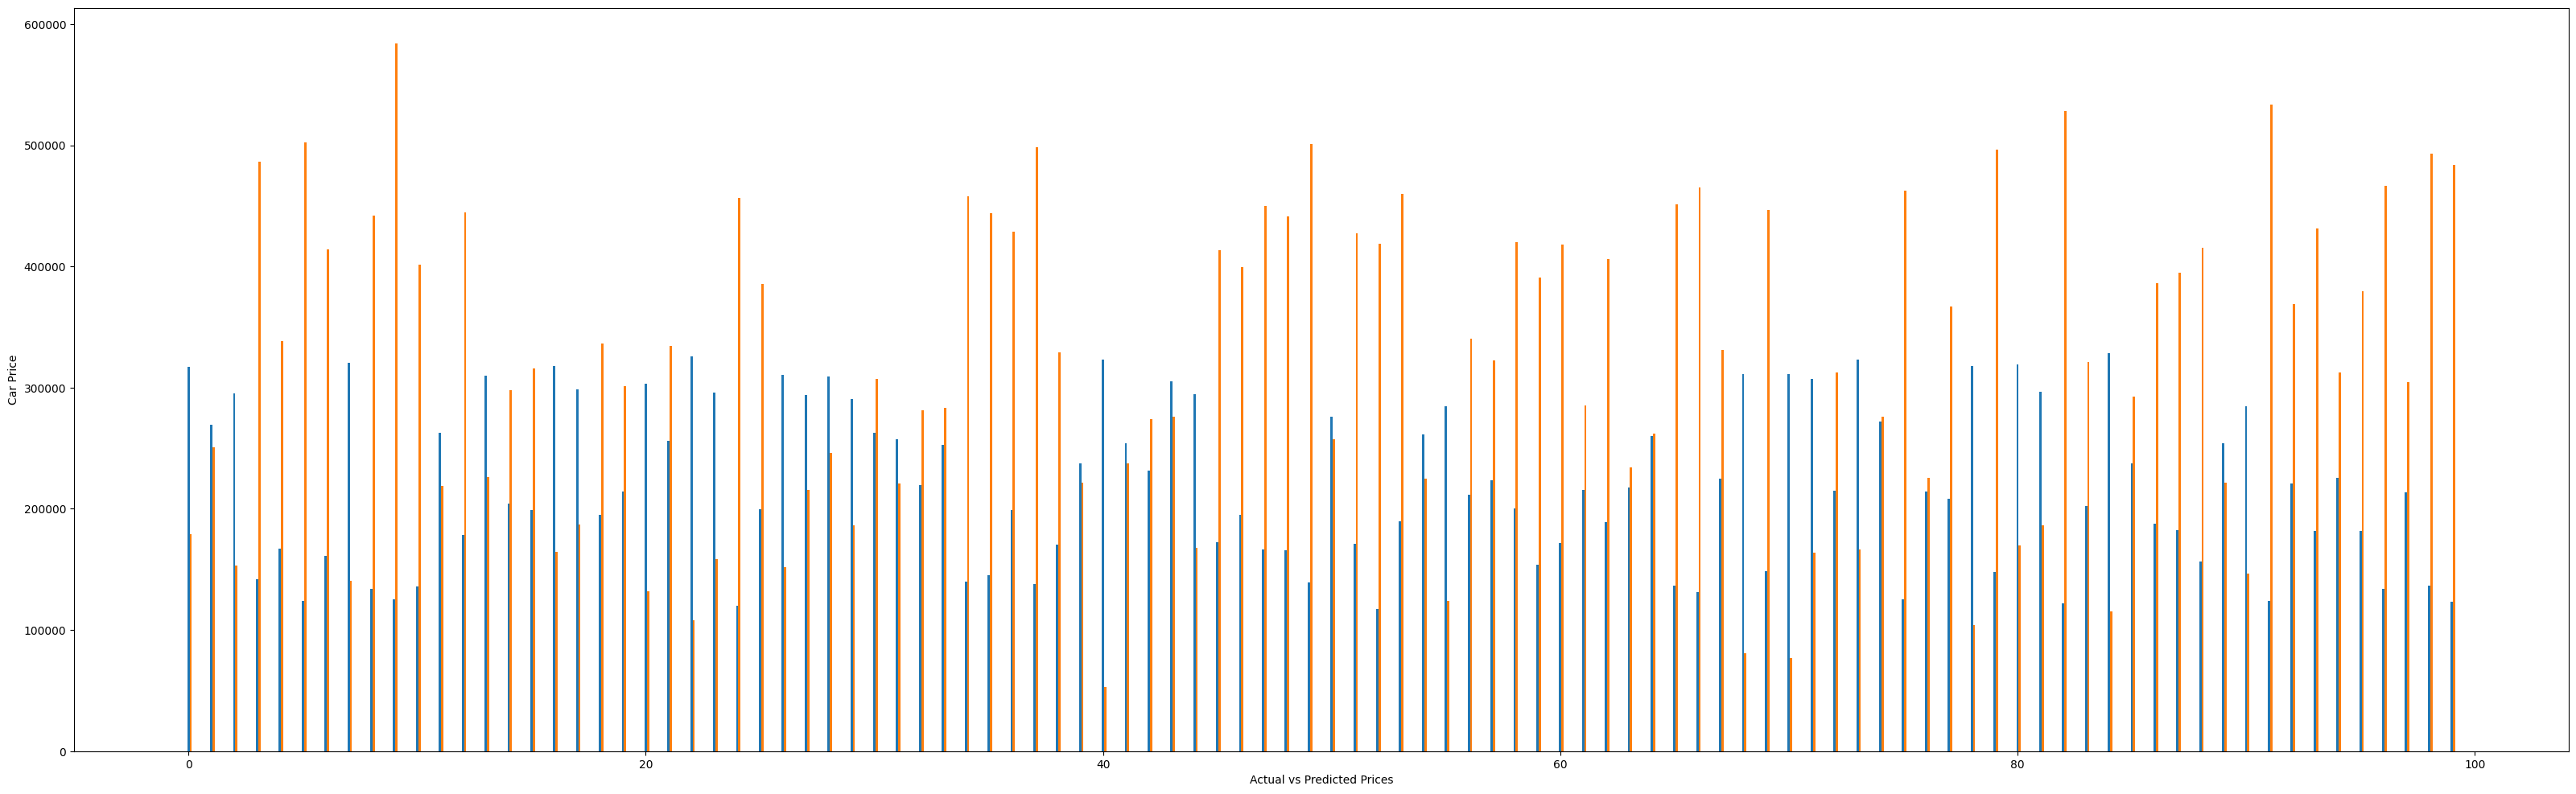

In [53]:
import numpy as np
ind = np.arange(100)

print(ind)
plt.figure(figsize = (40,12))

width = 0.1

plt.bar(ind, y_pred, width, label = "Predicted car price")
plt.bar(ind + width, y_true, width, label = "Actual Car Price")

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel("Car Price")

plt.show()

# Corrective Measures

In [65]:
model = tf.keras.Sequential([
    InputLayer(input_shape =(8,)),
    normalizer,
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),

    Dense(1)


])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [66]:
model.compile(
    loss=MeanAbsoluteError(),  # Instantiate MeanAbsoluteError
    optimizer='adam',
    metrics=['mean_squared_error']  # Optionally add evaluation metrics
)

In [67]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(
    buffer_size = 8,
    reshuffle_each_iteration=True
).batch(32).prefetch(tf.data.AUTOTUNE)

In [68]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(
    buffer_size = 8,
    reshuffle_each_iteration=True
).batch(32).prefetch(tf.data.AUTOTUNE)

In [69]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = val_dataset.shuffle(
    buffer_size = 8,
    reshuffle_each_iteration=True
).batch(32).prefetch(tf.data.AUTOTUNE)

In [70]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    verbose =1
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 310137.4688 - mean_squared_error: 111977308160.0000 - val_loss: 329341.2188 - val_mean_squared_error: 123353735168.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310240.8125 - mean_squared_error: 112134881280.0000 - val_loss: 329270.3125 - val_mean_squared_error: 123306983424.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310753.0625 - mean_squared_error: 112521224192.0000 - val_loss: 328950.9688 - val_mean_squared_error: 123097055232.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309714.4688 - mean_squared_error: 111740018688.0000 - val_loss: 327955.5938 - val_mean_squared_error: 122445733888.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308064.8750 - mean_squared_error: 110803189760.0000 - val_loss: 325500.6250 - val_mean_squared_error: 120851562496.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305819.2812 - mean_squared_error: 10941124608

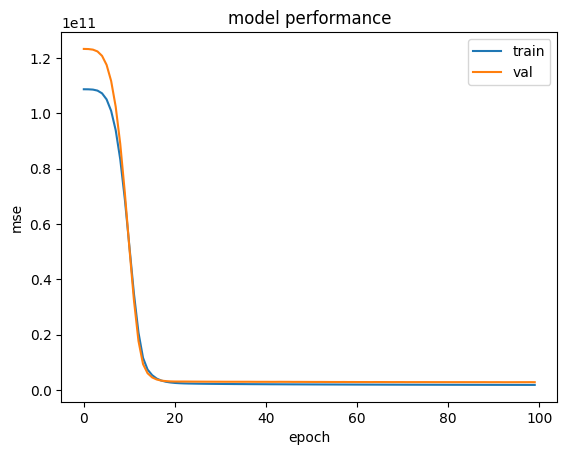

In [71]:
from matplotlib import pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

plt.title('model performance')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

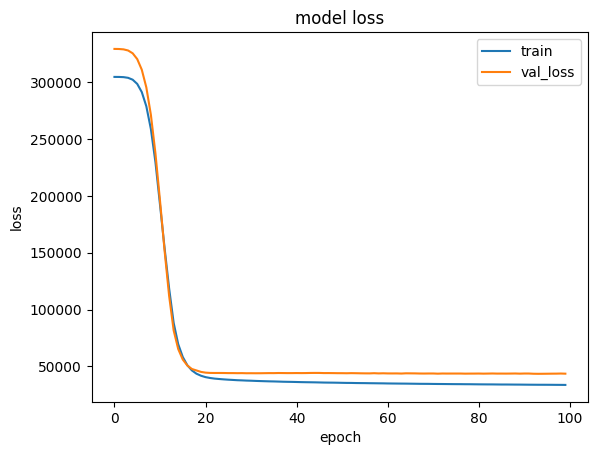

In [72]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()